In [ ]:
#ONLY FIRST TIME 
################################################

#!pip install scipy scikit-image

In [1]:
#%matplotlib inline
from pyvista import set_plot_theme
set_plot_theme('document')


# 1.3b: 2-D sections


Importing



In [2]:
import gempy as gp
import gempy_viewer as gpv
import numpy as np

np.random.seed(1234)

/home/shdsp/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Setting Backend To: AvailableBackends.numpy


## Setup the model




Importing the data from CSV-files and setting extent and resolution



In [11]:
data_path = 'https://raw.githubusercontent.com/cgre-aachen/gempy_data/master/'

geo_model: gp.data.GeoModel = gp.create_geomodel(
    project_name='Tutorial_ch1_1_Basics',
    extent=[0, 2000, 0, 2000, 0, 750],
    resolution=[50, 50, 50],  # * Here we define the resolution of the voxels
    refinement=4,  # * Here we define the number of octree levels. If octree levels are defined, the resolution is ignored.
    importer_helper=gp.data.ImporterHelper(
        path_to_orientations="simple_fault_model_orientations.csv",
        path_to_surface_points="simple_fault_model_points.csv",
    )
)

gp.map_stack_to_surfaces(
    gempy_model=geo_model,
    mapping_object=  # TODO: This mapping I do not like it too much. We should be able to do it passing the data objects directly
    {
        "Fault_Series": 'Main_Fault',
        "Strat_Series": ('Sandstone_2', 'Siltstone', 'Shale', 'Sandstone_1')
    }
)

gp.set_is_fault(
    frame=geo_model.structural_frame,
    fault_groups=['Fault_Series']
)

StructuralFrame(
	structural_groups=[
StructuralGroup(
	name=Fault_Series,
	structural_relation=StackRelationType.FAULT,
	elements=[
Element(
	name=Main_Fault,
	color=#527682,
	is_active=True
)
]
),
StructuralGroup(
	name=Strat_Series,
	structural_relation=StackRelationType.ERODE,
	elements=[
Element(
	name=Sandstone_2,
	color=#ffbe00,
	is_active=True
),
Element(
	name=Siltstone,
	color=#443988,
	is_active=True
),
Element(
	name=Shale,
	color=#728f02,
	is_active=True
),
Element(
	name=Sandstone_1,
	color=#9f0052,
	is_active=True
)
]
)
],
	fault_relations=
[[False,  True],
 [False, False]],

/home/shdsp/anaconda3/envs/gempy2024/lib/python3.10/site-packages/gempy_viewer/API/_plot_2d_API.py:174: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.fig.show()


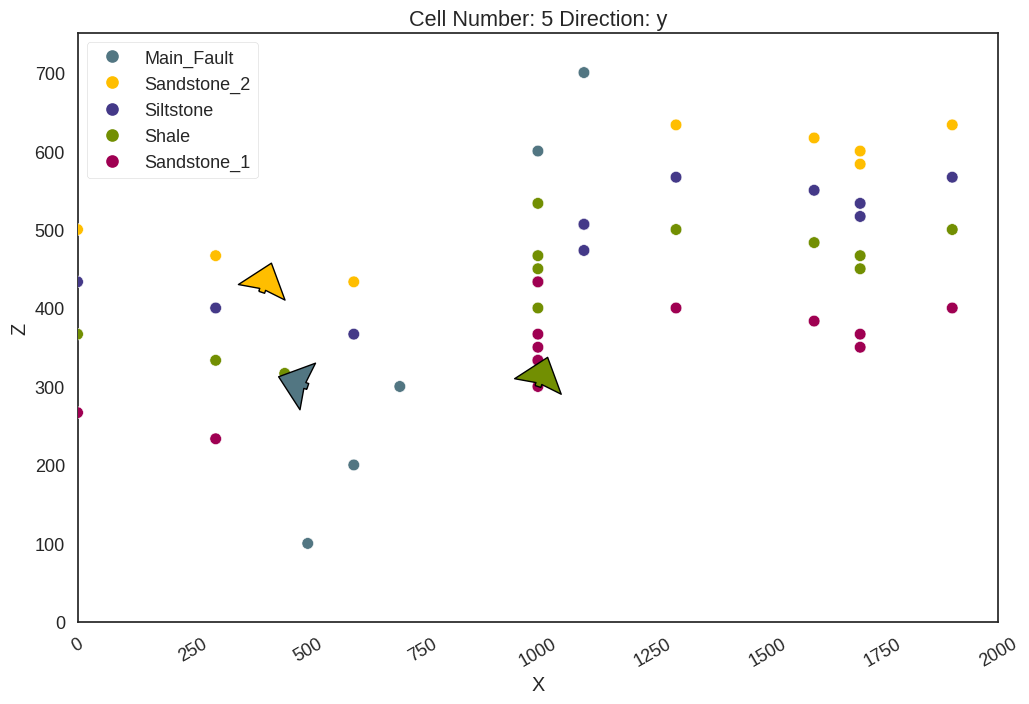

In [12]:
gpv.plot_2d(geo_model,orientation='y',cell_number=5)

In [13]:
sol = gp.compute_model(geo_model)

Setting Backend To: AvailableBackends.numpy
Chunking done: 15 chunks


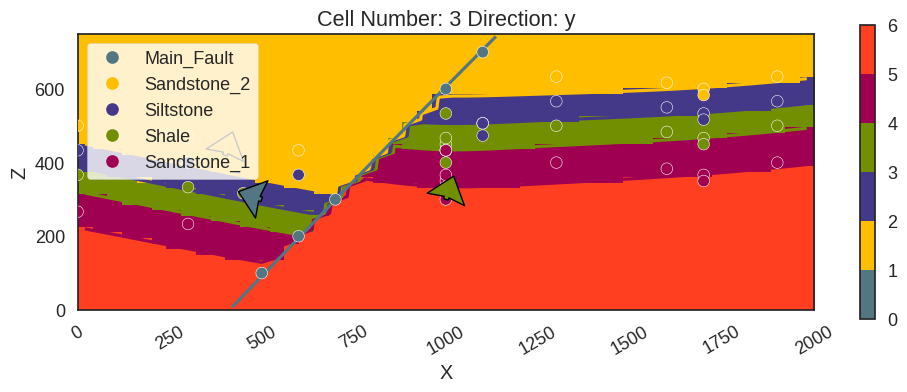

In [24]:
gpv.plot_2d(geo_model,show_boundaries=True,show_results=True,cell_number=3)

### Add sections




pass section dictionary with startpoint, endpoint and resolution for
every section:




In [25]:
gp.set_section_grid(
    grid=geo_model.grid,
    section_dict={
        'section1': ([0, 0], [2000, 2000], [100, 80]),
        'section2': ([800, 0], [800, 2000], [150, 100]),
        'section3': ([0, 200], [1500, 500], [200, 150])
    }  # p1,p2,resolution
)

Active grids: GridTypes.NONE|SECTIONS|DENSE


,start,stop,resolution,dist
section1,"[0, 0]","[2000, 2000]","[100, 80]",2828.427125
section2,"[800, 0]","[800, 2000]","[150, 100]",2000.000000
section3,"[0, 200]","[1500, 500]","[200, 150]",1529.705854


### Add topography




In [26]:
gp.set_topography_from_random(
    grid=geo_model.grid,
    fractal_dimension=1.2,
    d_z=np.array([300, 750]),
    topography_resolution=np.array([50, 50])
)

Active grids: GridTypes.NONE|SECTIONS|TOPOGRAPHY|DENSE


Active grids:




In [27]:
geo_model.grid.active_grids

<GridTypes.NONE|SECTIONS|TOPOGRAPHY|DENSE: 1050>

/home/shdsp/anaconda3/envs/gempy2024/lib/python3.10/site-packages/gempy_viewer/API/_plot_2d_API.py:200: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plot.fig.show()


<function gempy_viewer.modules.plot_2d.drawer_traces_2d.plot_section_traces(gempy_model: gempy.core.data.geo_model.GeoModel, ax, section_names: list = None)>

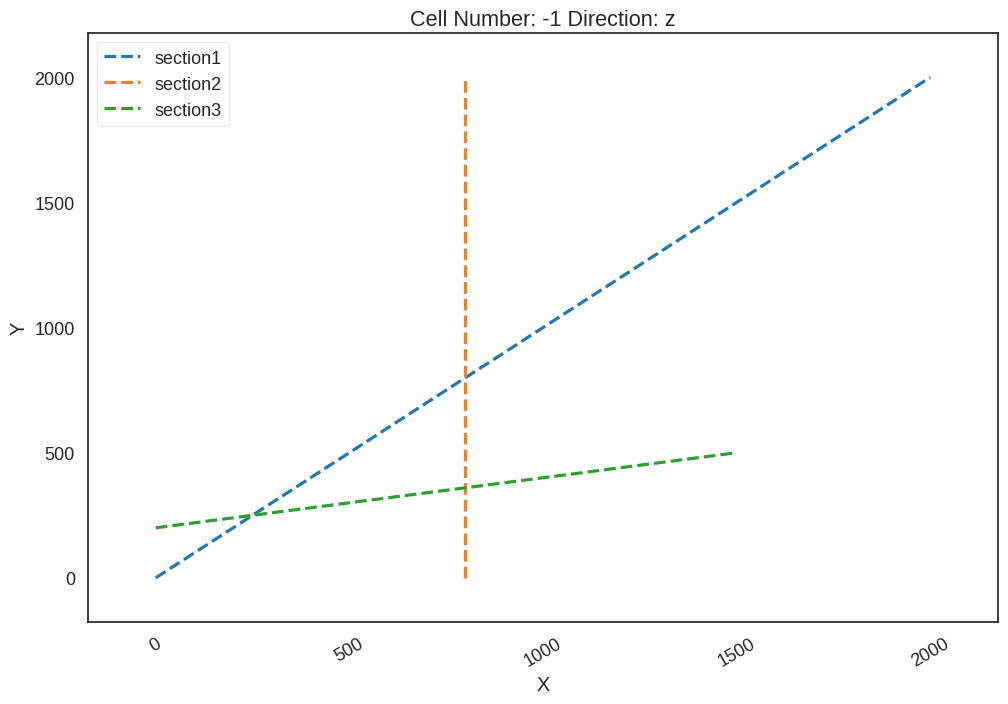

In [28]:
gpv.plot_section_traces(geo_model)

In [29]:
geo_model.interpolation_options.mesh_extraction = False
sol = gp.compute_model(geo_model)

Setting Backend To: AvailableBackends.numpy
Chunking done: 21 chunks


/home/shdsp/anaconda3/envs/gempy2024/lib/python3.10/site-packages/gempy_viewer/API/_plot_2d_sections_api.py:105: UserWarning: Section contacts not implemented yet. We need to pass scalar field for the sections grid
  warnings.warn(
/home/shdsp/anaconda3/envs/gempy2024/lib/python3.10/site-packages/gempy_viewer/API/_plot_2d_API.py:174: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.fig.show()


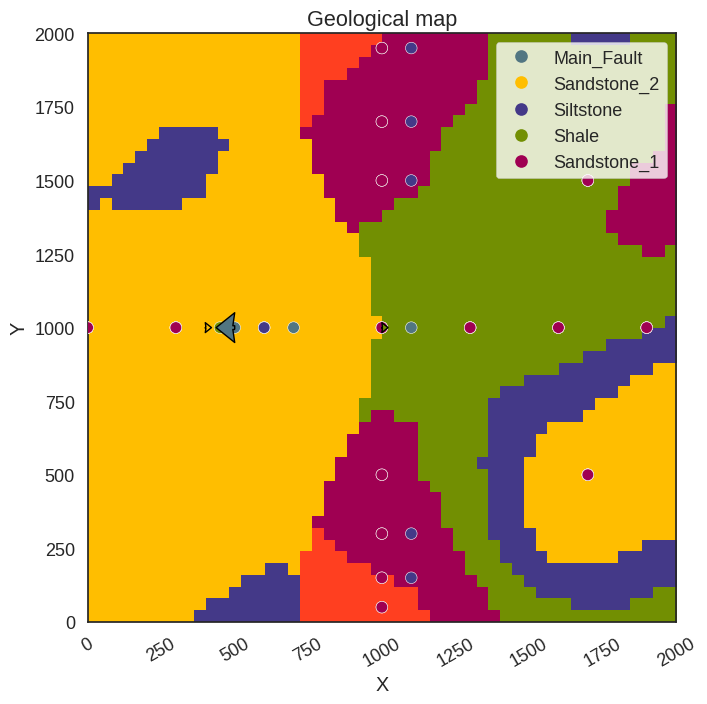

In [30]:
gpv.plot_2d(geo_model, section_names=['topography'])

/home/shdsp/anaconda3/envs/gempy2024/lib/python3.10/site-packages/gempy_viewer/API/_plot_2d_sections_api.py:105: UserWarning: Section contacts not implemented yet. We need to pass scalar field for the sections grid
  warnings.warn(
/home/shdsp/anaconda3/envs/gempy2024/lib/python3.10/site-packages/gempy_viewer/API/_plot_2d_API.py:174: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.fig.show()


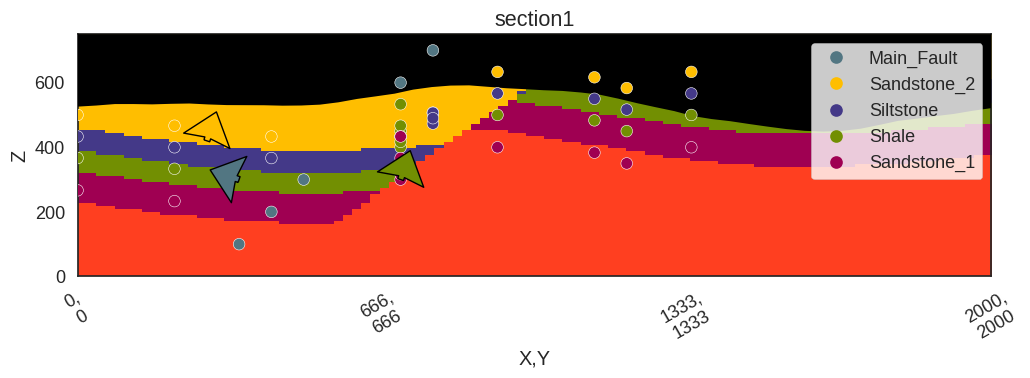

In [33]:
gpv.plot_2d(geo_model, section_names=['section1'],show_topography=True)

/home/shdsp/anaconda3/envs/gempy2024/lib/python3.10/site-packages/gempy_viewer/API/_plot_2d_sections_api.py:105: UserWarning: Section contacts not implemented yet. We need to pass scalar field for the sections grid
  warnings.warn(
/home/shdsp/anaconda3/envs/gempy2024/lib/python3.10/site-packages/gempy_viewer/API/_plot_2d_API.py:174: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.fig.show()


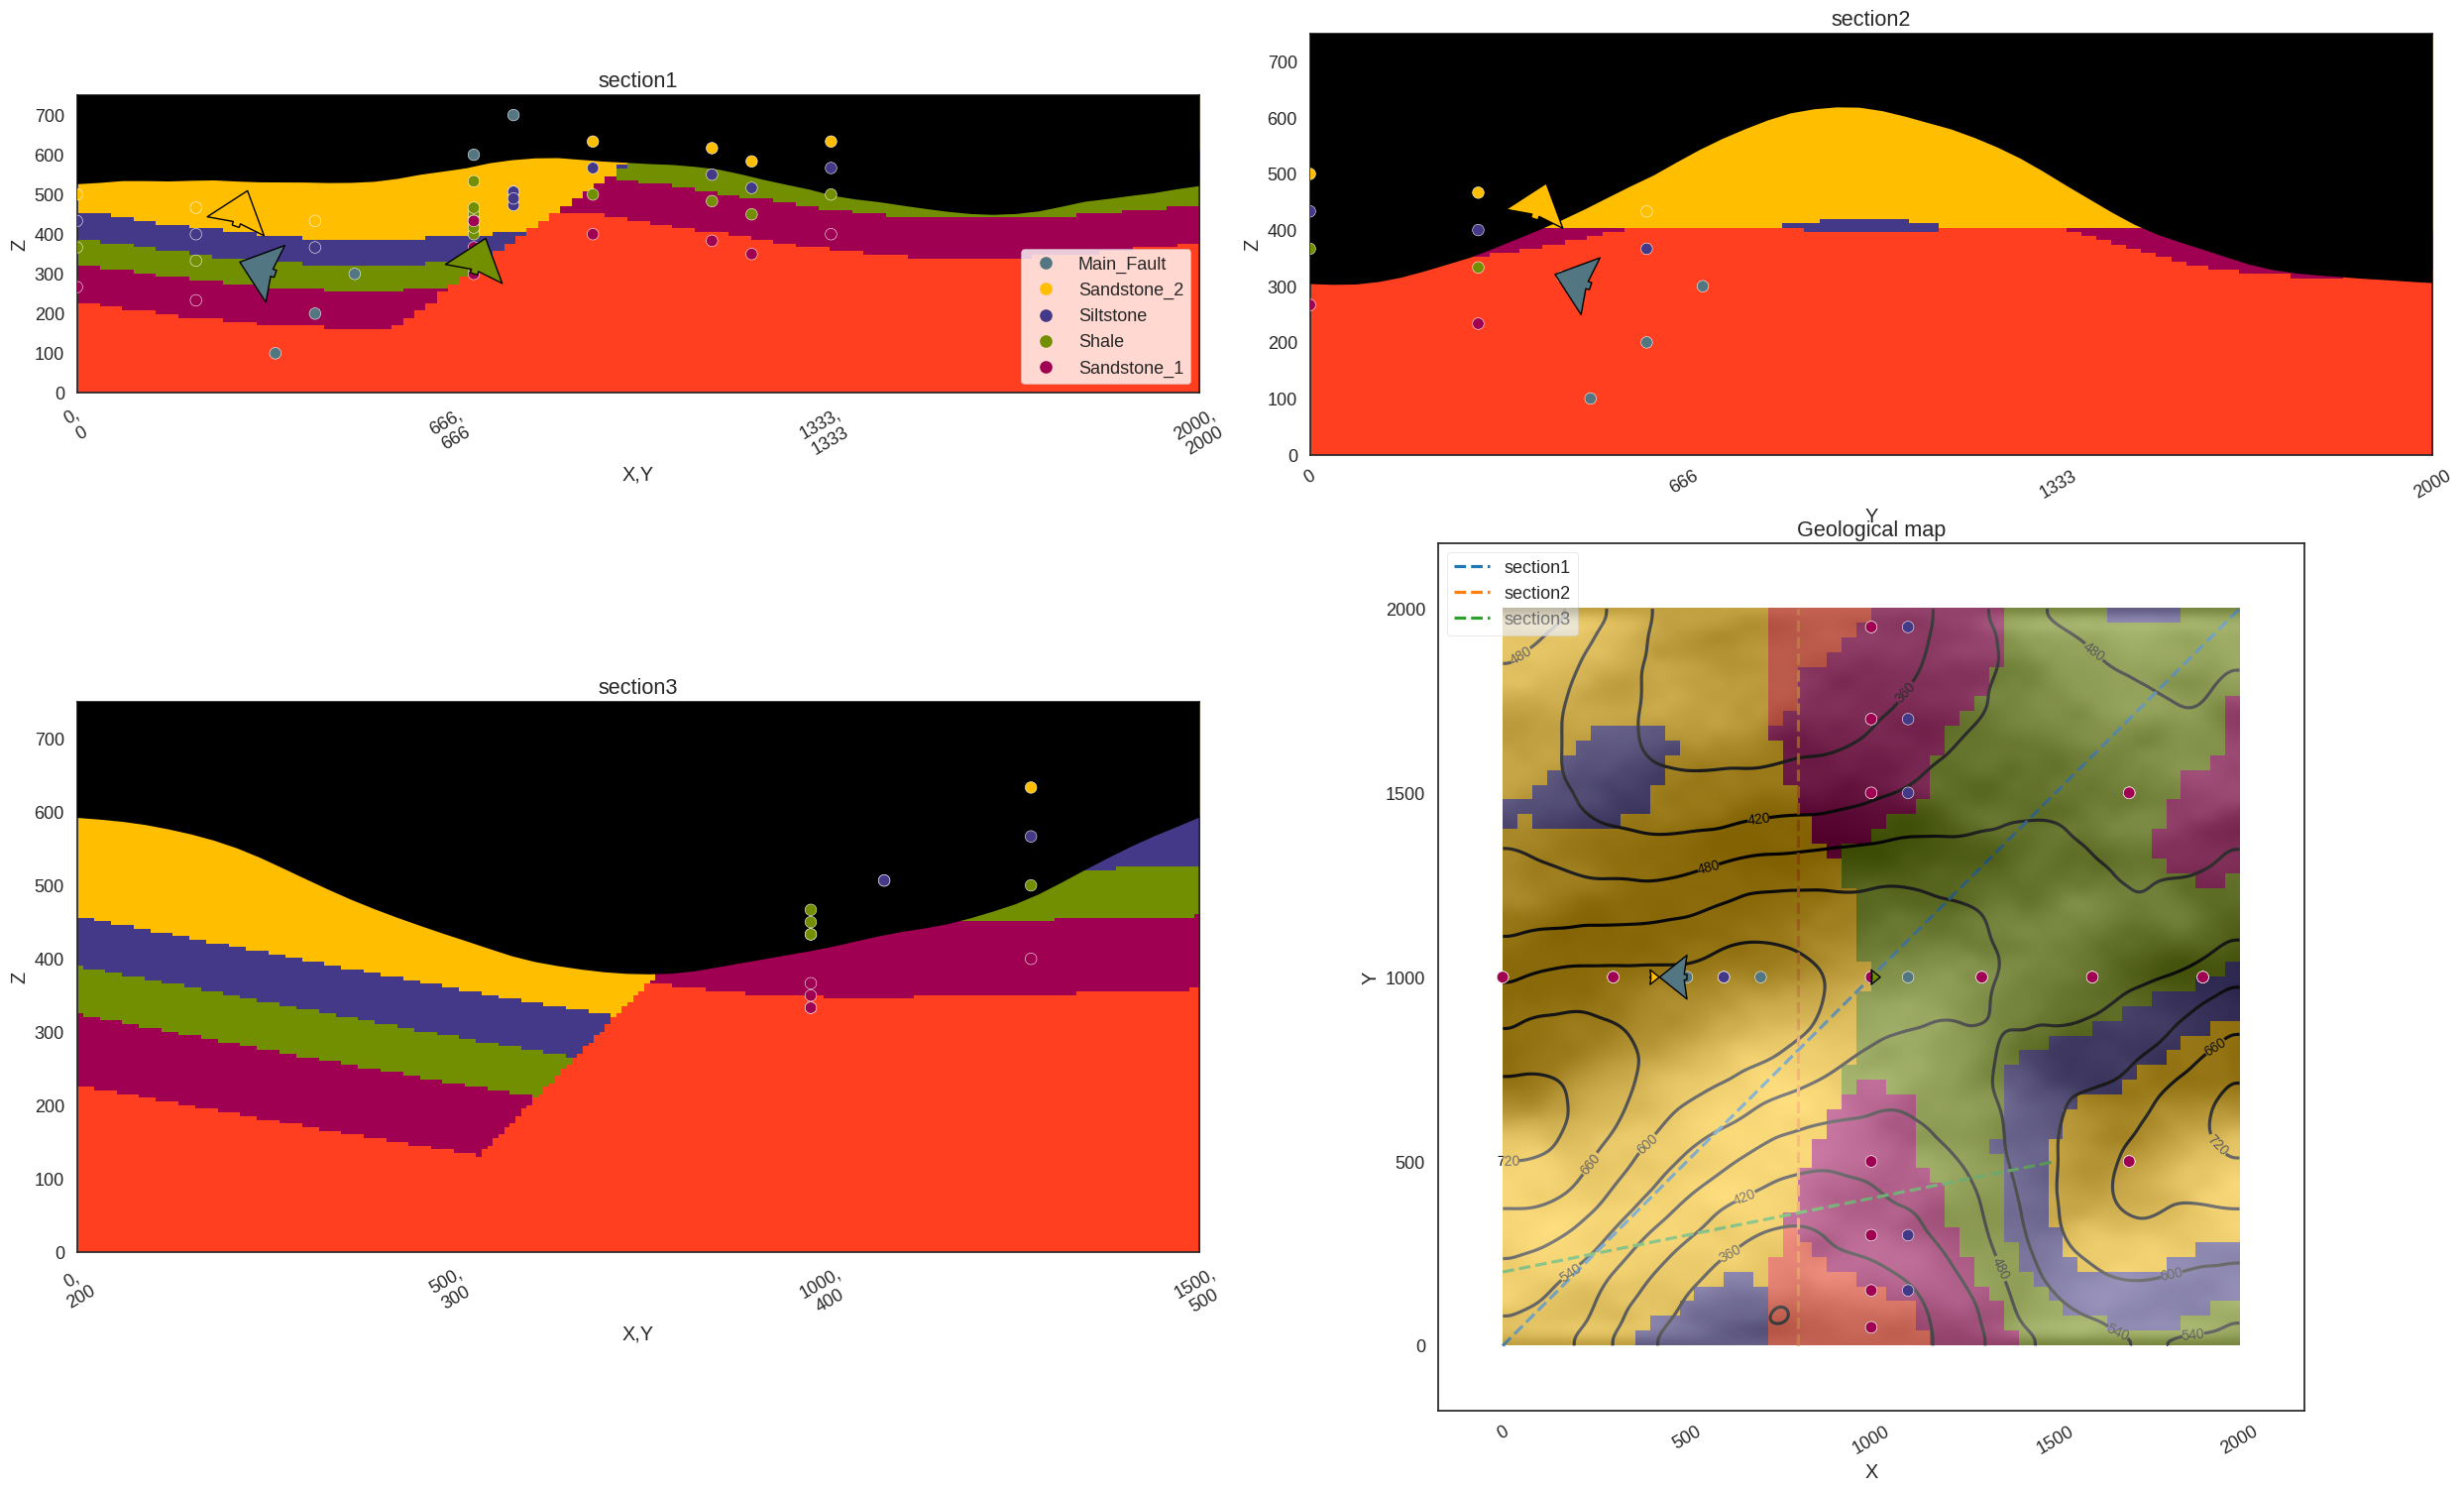

In [34]:
gpv.plot_2d(
    model=geo_model,
    section_names=['section1', 'section2', 'section3', 'topography'],
    show_topography=True
)


# sphinx_gallery_thumbnail_number = 4

In [14]:
gpv.plot_3d(    model=geo_model)